# Importing the packages

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# Reading the data from csv file

In [48]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [49]:
df.shape

(13320, 9)

In [50]:
g=df.groupby('area_type')['area_type']
g.count()
#df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Deleting unnecessary columns

In [51]:
df2=df.drop(['area_type','availability','society','balcony'],axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data cleaning

In [52]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [53]:
df2=df2[df2['size'].notna()]
df2=df2[df2['location'].notna()]

In [54]:
df2.shape

(13303, 5)

Removing alphabets from size column and converting to integer...

In [55]:
df2=df2.replace({
    'size':'[A-Za-z]'
},'',regex=True)

In [56]:
df3=df2['size'].apply(lambda x:int(x[0:len(x)-1]))

In [57]:
df2=df2.drop(['size'],axis="columns")

In [58]:
df3=pd.concat([df2,df3],axis=1)

In [59]:
df3

,location,total_sqft,bath,price,size
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [60]:
df3.isnull().sum()

location       0
total_sqft     0
bath          57
price          0
size           0
dtype: int64

NaN values present in 'bath' column is filled with the median of bathrooms of that specific BHK size in the dataframe

In [61]:
zz=df3.groupby('size')

In [62]:
bath_dict={}
for a,s in zz:
    bath_dict[a]=s['bath'].median()
bath_dict

{1: 1.0,
 2: 2.0,
 3: 3.0,
 4: 4.0,
 5: 5.0,
 6: 6.0,
 7: 7.0,
 8: 8.0,
 9: 9.0,
 10: 10.0,
 11: 10.0,
 12: 6.0,
 13: 13.0,
 14: 15.0,
 16: 16.0,
 18: 18.0,
 19: 16.0,
 27: 27.0,
 43: 40.0}

In [63]:
df7=df3.copy()
df7.reset_index(inplace=True)
df7.tail()

,index,location,total_sqft,bath,price,size
13298,13315,Whitefield,3453,4.0,231.0,5
13299,13316,Richards Town,3600,5.0,400.0,4
13300,13317,Raja Rajeshwari Nagar,1141,2.0,60.0,2
13301,13318,Padmanabhanagar,4689,4.0,488.0,4
13302,13319,Doddathoguru,550,1.0,17.0,1


In [64]:
import math
for i,row in df7.iterrows():
    if (math.isnan(row['bath'])):
        df7[i:i+1]['bath']=bath_dict[df7.loc[i]['size']]

<ipython-input-64-e5b0ee8505a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[i:i+1]['bath']=bath_dict[df7.loc[i]['size']]


In [65]:
df7.isnull().sum()

index         0
location      0
total_sqft    0
bath          0
price         0
size          0
dtype: int64

In 'total_sqft' column, there are some values given in ranges. Those ranges are replaced by the average of min. value and max. value. Also, some values are not given in sq. feet. Such values are deleted from the column...

In [66]:
def meanfunction(x):
    listt=x.split("-")
    if len(listt)==2:
        return float(listt[0])+float(listt[1])/2
    try:
        return float(x)
    except:
        return None

df7['total_sqft']=df7['total_sqft'].apply(meanfunction)

In [67]:
df7=df7.dropna()
df7.reset_index(inplace=True)
df7=df7.drop('index',axis="columns")

In [68]:
df7=df7.drop('level_0',axis="columns")
df7

,location,total_sqft,bath,price,size
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13252,Whitefield,3453.0,4.0,231.00,5
13253,Richards Town,3600.0,5.0,400.00,4
13254,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13255,Padmanabhanagar,4689.0,4.0,488.00,4


In [95]:
df7.to_csv("Dataset after data cleaning.csv")

# Feature Engineering

'Price per sq. feet' column is added to the dataframe.

In [70]:
df8=df7.copy()
df8['price per sqft']=df8['price']*100000/df8['total_sqft']
df8.head()

,location,total_sqft,bath,price,size,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [71]:
len(df8.location.unique())

1298

While applying machine learning models, if there is categorical data in any column, we use "ONE HOT ENCODER" to create the dummy columns. Here, in 'location' column, there 1298 unique values. Applying one hot encoder is difficult in this case. This is a high dimensionality problem. So, 'Other' value will be created in 'location' column which contains all the locations which are present in less than or equal to 10 rows in the dataframe. (means those location names are replaced by the name 'Other')

Spaces in starting and ending of location values are removed by using strip() method.

In [72]:
df8.location=df8.location.apply(lambda x:x.strip())

In [73]:
df8

,location,total_sqft,bath,price,size,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13252,Whitefield,3453.0,4.0,231.00,5,6689.834926
13253,Richards Town,3600.0,5.0,400.00,4,11111.111111
13254,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13255,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [74]:
grp=df8.groupby('location')['location'].agg('count').sort_values(ascending=False)
grp

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

Check the number of locations which are present in less than or equal to 10 rows.

In [75]:
len(grp[grp<=10])

1047

In [76]:
locations_lessthan_10=grp[grp<=10]

In [77]:
df8['location']=df8['location'].apply(lambda x:'Other' if x in locations_lessthan_10 else x)

In [78]:
len(df8.location.unique())

241

In [96]:
df8.to_csv('Dataset after feature engineering.csv')

# Outlier detection and removal

An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error.

Outlier 1: The minimum size of the room should be 200 sq. feet (Assume). So, we need to check if there are any houses with less than 200 sq. feet room size and remove them

In [79]:
df9=df8[~(df8['total_sqft']/df8['size']<200)]

In [80]:
df9.shape

(12917, 6)

In [81]:
df9['price per sqft'].describe()

count     12917.000000
mean       6470.283179
std        4346.390095
min         267.829813
25%        4200.000000
50%        5333.333333
75%        7083.333333
max      176470.588235
Name: price per sqft, dtype: float64

In [82]:
df9

,location,total_sqft,bath,price,size,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13252,Whitefield,3453.0,4.0,231.00,5,6689.834926
13253,Other,3600.0,5.0,400.00,4,11111.111111
13254,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13255,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


Outlier 2: Here, we can see that min. price per sqft is 267 which is highly impossible and max. price per sqft is 176470 which is possible but only in very few cases (in very high level areas). So, to build an ML model, it is better to remove very low priced data and very high priced data. This can be done by using standard deviation and mean. Let us assume that the 'price per sqft' column is normally distributed for all locations. 

Let us take data under 2 standard deviations i.e, 95% of the data are within 2 standard deviations of the mean.

In [83]:
def remove_outlier2(df):
    df_output=pd.DataFrame()
    for location,its_df in df.groupby('location'):
        mean_val=np.mean(its_df['price per sqft'])
        std_val=np.std(its_df['price per sqft'])
        reduced_df=its_df[(its_df['price per sqft']>(mean_val-2*std_val)) & (its_df['price per sqft']<(mean_val+2*std_val))] #brackets are important. keep them properly
        df_output=pd.concat([df_output,reduced_df],ignore_index=True)
    return df_output

In [84]:
df10=remove_outlier2(df9)

In [85]:
df10

,location,total_sqft,bath,price,size,price per sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,2400.0,4.0,450.00,4,18750.000000
...,...,...,...,...,...,...
12364,Yeshwanthpur,1676.0,3.0,92.13,3,5497.016706
12365,Yeshwanthpur,2503.0,3.0,138.00,3,5513.383939
12366,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032
12367,Yeshwanthpur,1876.0,3.0,160.00,3,8528.784648


Outlier 3: In some locations, even though 2BHK and 3BHK has same total sq. feet or just closer, the price of 2BHK is greater than the price of 3BHK. This kind of data should be removed to train the model properly.

Let us plot a scatter plot between total_sqft vs price for 2BHK and 3BHK for a single location...

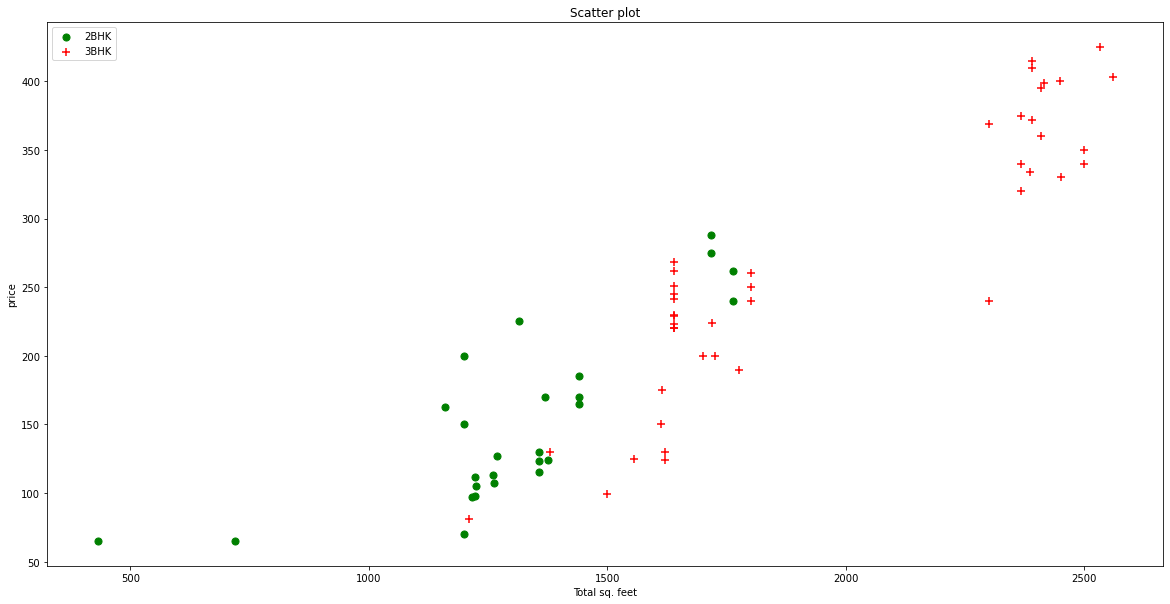

In [86]:
def plotfunc(df10,location):
    df_2bhk=df10[(df10['size']==2) & (df10['location']==location)]
    df_3bhk=df10[(df10['size']==3) & (df10['location']==location)]
    plt.scatter(df_2bhk.total_sqft,df_2bhk.price,c='g',label='2BHK',s=50)
    plt.scatter(df_3bhk.total_sqft,df_3bhk.price,c='r',label='3BHK',s=50,marker='+')
    plt.xlabel('Total sq. feet')
    plt.ylabel('price')
    plt.title('Scatter plot')
    plt.legend()

plotfunc(df10,'Rajaji Nagar')

In the above graph, we can see that at some points, 3BHK price is less tham 2BHK price. So, we will delete 3BHK data in such cases.

In [87]:
def remove_odd_price_rows(df):
    #create a numpy array to store indexes which are to be deleted
    del_indexes=np.array([])
    #iterate through all locations
    for location,location_df in df.groupby('location'):
        #create a dictionary to store mean and count of price per sq. feet for all BHKs
        BHK_dict={}
        #iterate through all BHKs
        for BHK,BHK_df in location_df.groupby('size'):
            BHK_dict[BHK]={
                'mean':np.mean(BHK_df['price per sqft']),
                'count':BHK_df.shape[0]
            }
        #again iterate through all BHKs
        for BHK,BHK_df in location_df.groupby('size'):
            
            #store the previous room stats(mean and count) in prev_roomstats variable which is a dict (if 1BHK and 3BHK are there and 2BHK does not exist, then while the iterator is in 3BHK, 1BHK data will be stored in prev_roomstats)
            prev_roomstats=None
            for i in range(BHK-1,0,-1):
                if BHK_dict.get(i)!=None:
                    prev_roomstats=BHK_dict.get(i)
                    break
            
            #check whether prev_roomstats exists or not and also we need to compare present BHK price per sq. feet with previous BHK mean price per sq. feet only when prev. BHK count is greater than 8.
            if prev_roomstats and prev_roomstats['count']>5:
                #store the indexes that needs to be deleted.
                del_indexes=np.append(del_indexes,BHK_df[BHK_df['price per sqft']<prev_roomstats['mean']].index.values)
                
    return df.drop(del_indexes,axis='index')

In [88]:
df11 = remove_odd_price_rows(df10)
df11

,location,total_sqft,bath,price,size,price per sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,2400.0,4.0,450.00,4,18750.000000
...,...,...,...,...,...,...
12358,Yeshwanthpur,1195.0,2.0,100.00,2,8368.200837
12361,Yeshwanthpur,2500.0,5.0,185.00,6,7400.000000
12363,Yeshwanthpur,1160.0,2.0,64.08,2,5524.137931
12366,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032


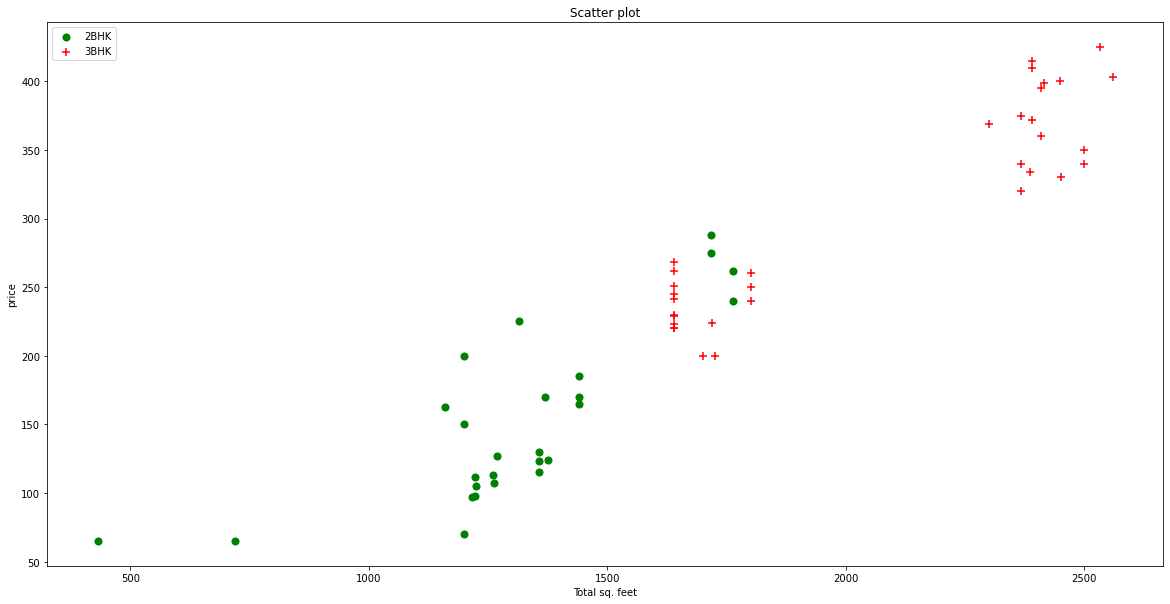

In [89]:
plotfunc(df11,'Rajaji Nagar')

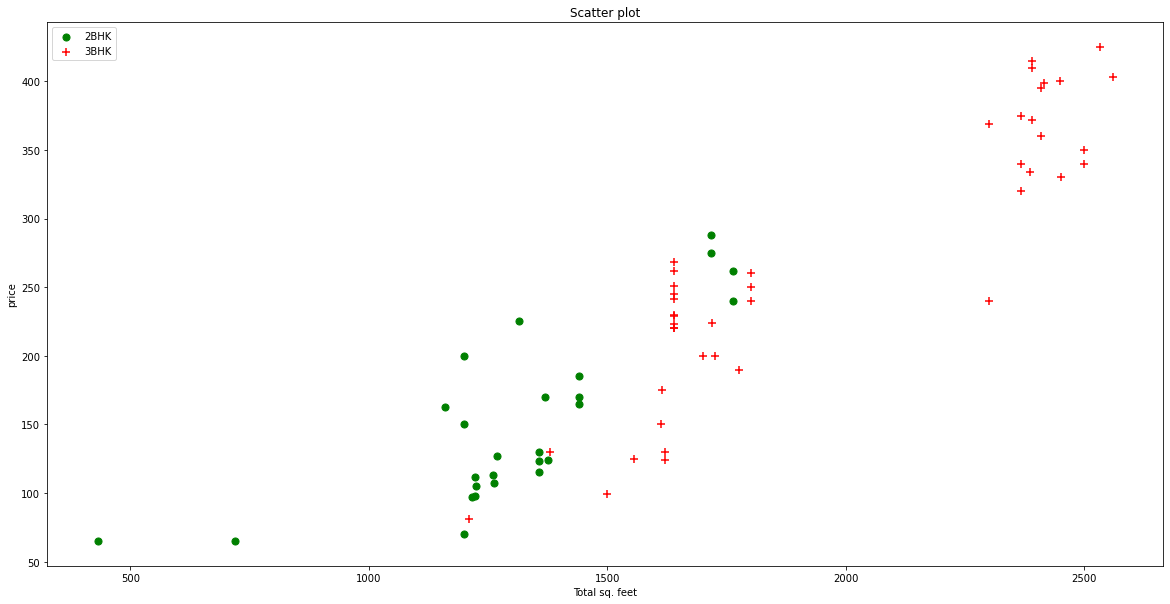

In [90]:
plotfunc(df10,'Rajaji Nagar')

Outlier 4: There are some houses where number of bathrooms are greater than number of bedrooms. It is usual for a 2 bedroom house having 3 bathrooms but having 6 bathrooms for a 3 bedroom house is unusual. So, we will delete all rows whose number of bathrooms are greater than number of bedrooms+2.

In [91]:
df11[(df11['bath']>df11['size']+2)]

,location,total_sqft,bath,price,size,price per sqft
68,5th Block Hbr Layout,2600.0,12.0,675.0,9,25961.538462
1822,Chamrajpet,1500.0,9.0,230.0,6,15333.333333
1977,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6439,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6847,Other,3300.0,14.0,500.0,9,15151.515152
8212,Other,1850.0,12.0,300.0,8,16216.216216
9699,Rajaji Nagar,7500.0,8.0,1700.0,5,22666.666667
10949,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [92]:
df12=df11[~(df11['bath']>df11['size']+2)]

In [93]:
df12

,location,total_sqft,bath,price,size,price per sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,2400.0,4.0,450.00,4,18750.000000
...,...,...,...,...,...,...
12358,Yeshwanthpur,1195.0,2.0,100.00,2,8368.200837
12361,Yeshwanthpur,2500.0,5.0,185.00,6,7400.000000
12363,Yeshwanthpur,1160.0,2.0,64.08,2,5524.137931
12366,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032


So, the outliers are successfully removed. We have price per sqft column just to detect outliers. so, we will now delete price per sqft column.

In [94]:
df13=df12.drop('price per sqft',axis='columns')
df13

,location,total_sqft,bath,price,size
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1200.0,6.0,125.00,6
3,1st Block Jayanagar,1875.0,2.0,235.00,3
4,1st Block Jayanagar,2400.0,4.0,450.00,4
...,...,...,...,...,...
12358,Yeshwanthpur,1195.0,2.0,100.00,2
12361,Yeshwanthpur,2500.0,5.0,185.00,6
12363,Yeshwanthpur,1160.0,2.0,64.08,2
12366,Yeshwanthpur,1855.0,3.0,135.00,3


In [97]:
df13.to_csv('Dataset after outlier removal.csv')